Eduardo Faccin Vernier

# High dimensional data and how to visualize it
Large number of attributes/independent variables/columns/...

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
path = './car-data.txt'
cars = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')
# Clean up missing data
cars.dropna(inplace=True)
cars.index = range(len(cars))
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino



## Popular methods for visualizing high dimensional data
- Scatter Plot Matrix
- Parallel Coordinates
- Radar Charts
- Matrices (color) / Heatmaps
- Enriched Scatter Plots
- **Projections**


### Projections reduce data dimensionality while attempting to maintain visual patterns that reflect the similarity on the original space.

## Advantages of projections
1. Scale well regarding number of observations, and more importantly, number of _dimensions_.
2. Robustness to noise, distance-preservation accuracy, and ease of use.
3. Can mix quantitative, categorical, and mixed attributes.
4. Projection plots often require little to no paramenter definition or choices on the part of the user. 

![](Figures/methods.png)

## Investigating the data

<IPython.core.display.Javascript object>


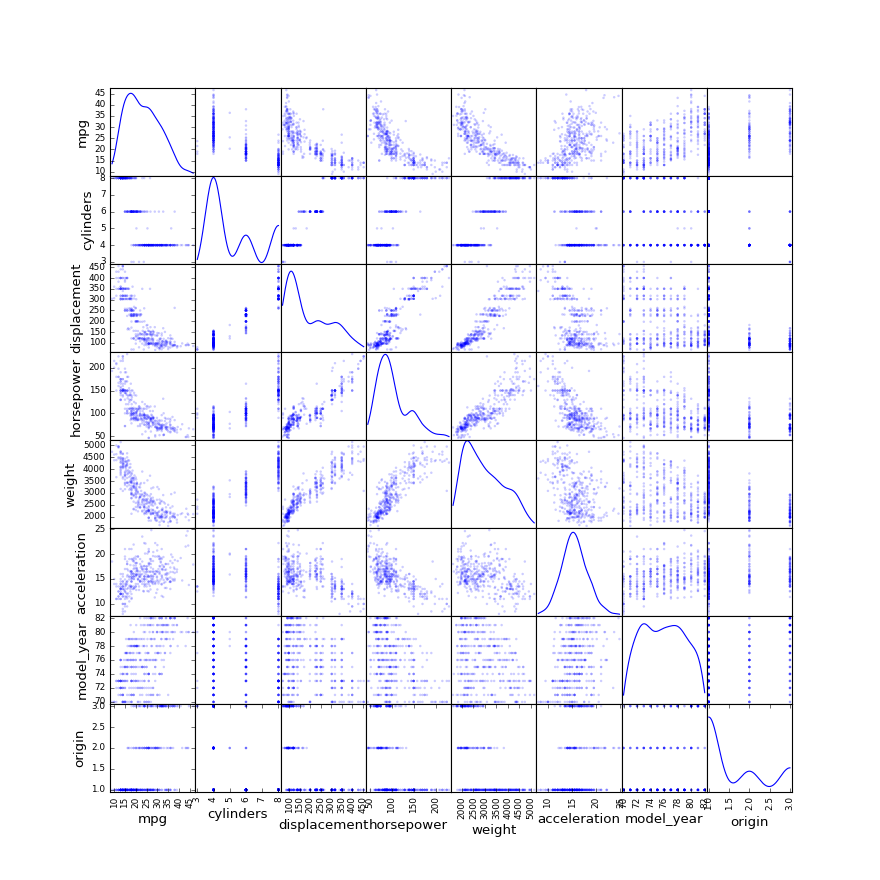

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(cars, alpha = 0.2, figsize = (11, 11), diagonal = 'kde');

<IPython.core.display.Javascript object>


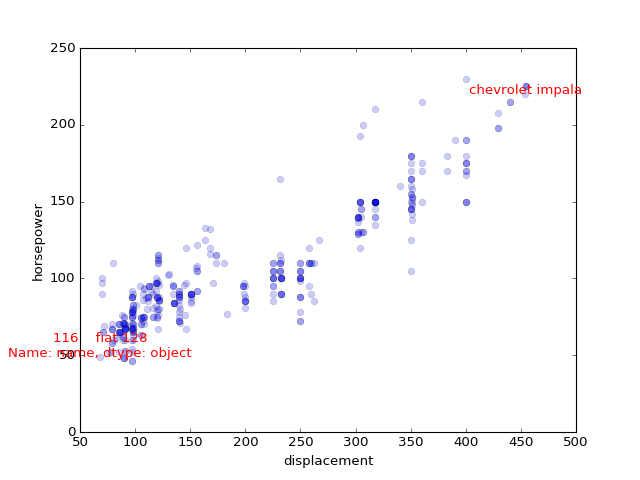

In [4]:
def onpick(event):
    global cars
    text = plt.gca().text(0, 0, "", color='red', horizontalalignment='center')
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    if(len(ind) == 1):
        text.set_position((xdata[ind], ydata[ind]))
        car_name = str(cars.iloc[ind]['name'])
        text.set_text(car_name)
    else: 
        text.set_position((xdata[ind[0]], ydata[ind[0]]))
        car_name = str(cars.iloc[ind[0]]['name'])
        text.set_text(car_name)

fig = plt.figure()
ax = fig.add_subplot(111)

X = cars[['displacement', 'horsepower']].as_matrix()
ax.plot(X[:, 0], X[:, 1], 'o', alpha=0.2, picker=10, pickradius=10)
ax.set(xlabel='displacement', ylabel='horsepower')

fig.canvas.mpl_connect('pick_event', onpick)
plt.show()

## Principal Component Analysis (PCA)

Principal Components Analysis (PCA) is a technique that finds underlying variables (known as principal components) that best differentiate your data points. Principal components are dimensions along which your data points are most spread out. PCs must be orthogonal.

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
print(pca.components_)

[[ 0.94733182  0.32025369]
 [-0.32025369  0.94733182]]


In [7]:
print(pca.explained_variance_)

[ 12172.12281641    259.81413065]


<IPython.core.display.Javascript object>


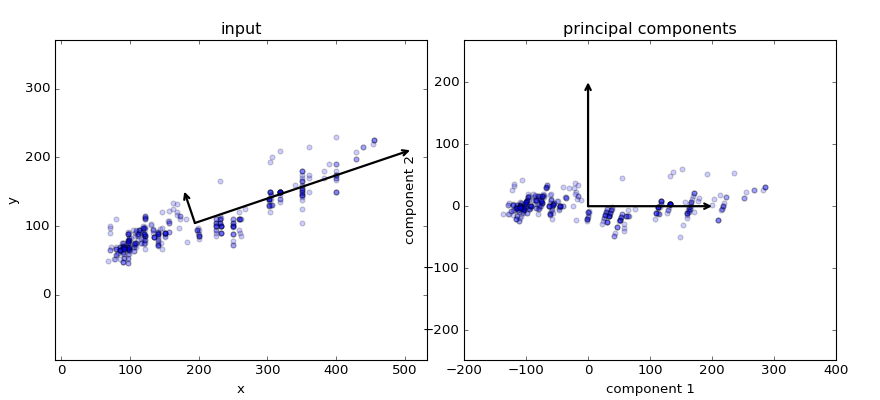

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops);

fig, ax = plt.subplots(1, 2, figsize=(11, 5))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].set(xlabel='x', ylabel='y', title='input')
ax[0].axis('equal')
ax[0].margins(0.2)


## plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 200], ax=ax[1])
draw_vector([0, 0], [200, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components')


<IPython.core.display.Javascript object>


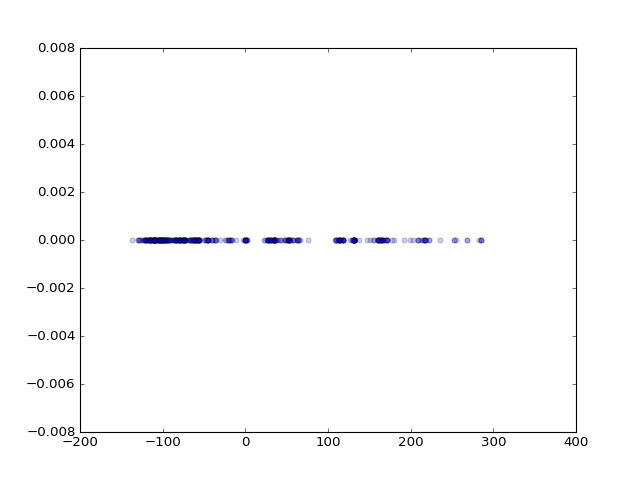

[ 0.97910107  0.02089893]


In [9]:
fig = plt.figure()
plt.scatter(X_pca[:, 0], np.zeros(len(X_pca)), alpha=0.2)
print(pca.explained_variance_ratio_)

# Reducing 8D to 2D

In [10]:
Y = cars[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]
Y.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
pca = PCA(n_components=8, whiten=True)
pca.fit(Y)
Y_pca = pca.transform(Y)

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.99753627,  0.99959952,  0.99995603,  0.99998771,  0.99999526,
        0.99999916,  0.99999965,  1.        ])

<IPython.core.display.Javascript object>


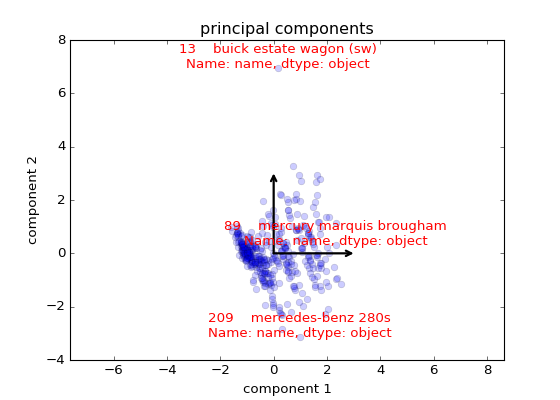

7

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

pca = PCA(n_components=2, whiten=True)
pca.fit(Y)
Y_pca = pca.transform(Y)

ax.plot(Y_pca[:, 0], Y_pca[:, 1], 'o', alpha=0.2, picker=10, pickradius=10)

draw_vector([0, 0], [0, 3], ax=ax)
draw_vector([0, 0], [3, 0], ax=ax)
ax.axis('equal')
ax.set(xlabel='component 1', ylabel='component 2',
          title='principal components')
fig.canvas.mpl_connect('pick_event', onpick)


In [14]:
Y.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Normalization

In [15]:
from sklearn import preprocessing
Y_norm = preprocessing.scale(Y)

In [16]:
pd.DataFrame(Y_norm).head()

,0,1,2,3,4,5,6,7
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


In [17]:
pd.DataFrame(Y_norm).describe()

,0,1,2,3,4,5,6,7
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,1.450087e-16,-1.087565e-16,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16,-1.160070e-15,1.359457e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.853218e+00,-1.451004e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00,-1.625315e+00,-7.166410e-01
25%,-8.269250e-01,-8.640136e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01,-8.098841e-01,-7.166410e-01
50%,-8.927701e-02,-8.640136e-01,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02,5.547151e-03,-7.166410e-01
75%,7.125143e-01,1.483947e+00,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01,8.209784e-01,5.263824e-01
max,2.970359e+00,1.483947e+00,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00,1.636410e+00,1.769406e+00


<IPython.core.display.Javascript object>


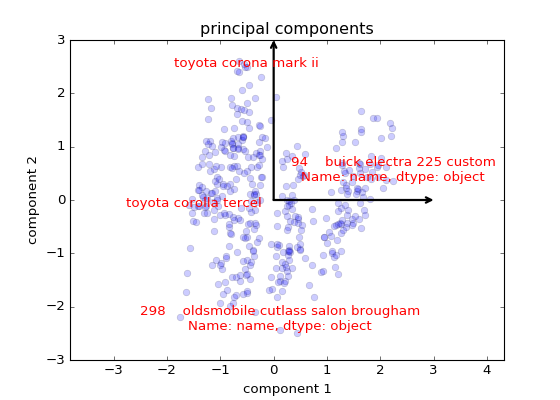

7

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

pca = PCA(n_components=2, whiten=True)
pca.fit(Y_norm)
Y_pca = pca.transform(Y_norm)

ax.plot(Y_pca[:, 0], Y_pca[:, 1], 'o', alpha=0.2, picker=10, pickradius=10)

draw_vector([0, 0], [0, 3], ax=ax)
draw_vector([0, 0], [3, 0], ax=ax)
ax.axis('equal')
ax.set(xlabel='component 1', ylabel='component 2',
          title='principal components')
fig.canvas.mpl_connect('pick_event', onpick)


![](Figures/pca-stats.png)

"Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality. Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule. RandomizedPCA, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while SparsePCA introduces a regularization term (see In Depth: Linear Regression) that serves to enforce sparsity of the components."

StatQuest: PCA main ideas in only 5 minutes
https://www.youtube.com/watch?v=HMOI_lkzW08

Python Data Science Handbook - Jake VanderPlas
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html